# Load Data

In [3]:
library(conflicted)  # solve tidyverse package conflicts with conflict_prefer()
library(tidyverse)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

Warning message:
"package 'ggplot2' was built under R version 4.3.2"
Warning message:
"package 'tidyr' was built under R version 4.3.2"
Warning message:
"package 'purrr' was built under R version 4.3.2"
Warning message:
"package 'dplyr' was built under R version 4.3.2"
Warning message:
"package 'stringr' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [4]:
df <- read.csv("Hausarbeit M7 Extraction Data.csv")
df <- df |> filter(Reviewer.Name == "Consensus")
df

Covidence..,Study.ID,Title,Reviewer.Name,Notes,Country.in.which.the.study.conducted,Objective,Study.design,Digital.solutions,Exercise.iterventions,⋯,NHLBI.9,NHLBI.9.supporting.text,NHLBI.10,NHLBI.10.supporting.text,NHLBI.11,NHLBI.11.supporting.text,NHLBI.12,NHLBI.12.supporting.text,NHLBI.Overall,NHLBI.Overall.supporting.text
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>
52,Cheong 2018,Efficacy of Mobile Health Care Application and Wearable Device in Improvement of Physical Performance in Colorectal Cancer Patients Undergoing Chemotherapy,Consensus,,Other: South Korea,"""to evaluate the efficacy and feasibility of comprehensive mobile health care using a tailored rehabilitation program for colorectal cancer patients undergoing active chemotherapy""",Pre-post study without control group,"mobile app (managing patient self-monitoring, health information provision, and communication facilitation), wearables (Urban S by Partron Co) for real-time monitoring of patient health status and recording daily activity), exercise videos","12 weeks ""stretching, aerobic, and muscle strengthening exercises""",⋯,Yes,NA,Yes,NA,Yes,NA,NA,NA,Fair,NA
48,Chan 2022,Quality of life of colorectal cancer survivors participating in a pilot randomized controlled trial of physical activity trackers and daily text messages,Consensus,,United States,"""to explore the effect of digital health tools on HRQoL in CRC survivors""",RCT (Fitbit Flex + daily text messages vs. print education material),Fitbit Flex and daily text messages,"text messages including ""education materials provided participants with informational and motivational messages on various exercise activities, such as brisk walking, jogging, and resistance training"" (intervention period = 12 weeks)",⋯,,NA,,NA,,NA,NA,NA,,NA
40,Cadmus-Bertram 2019,Building a physical activity intervention into clinical care for breast and colorectal cancer survivors in Wisconsin: a randomized controlled pilot trial,Consensus,,United States,"""tested the feasibility of augmenting care planning with a multi-level physical activity intervention""",RCT (standard care vs. technology-based augmented physical activity),Wearables (Fitbit) linked to electronic health record + study coordinator using this data for email coaching and providing suggestions,"""12-week, multi-component intervention based on self-monitoring and the development of self-regulatory skills (i.e., goal-setting, frequent feedback, frequent review of goals)""",⋯,,NA,,NA,,NA,NA,NA,,NA
35,Brennan 2022,Telehealth Delivery of a Multi-Disciplinary Rehabilitation Programme for Upper Gastro-Intestinal Cancer: ReStOre@Home Feasibility Study,Consensus,"Limitations: - ""programme is not suitable for individuals with low levels of physical function"" - no control",Other: Ireland,"to evaluate ""the feasibility of delivering a multi-disciplinary, multi-component rehabilitation programme (ReStOre@Home) to cancer survivors via telehealth""",Pre-post study without control group,Video calls,"""ReStOre@Home"" program: ""group resistance training, remotely monitored aerobic training, one-to-one dietetic counselling, one-to-one support calls and group education"" for 12 weeks.",⋯,Yes,NA,No,NA,Yes,NA,NA,NA,Fair,NA
14,Ayyoubzadeh 2020,Supporting colorectal cancer survivors using eHealth: a systematic review and framework suggestion,Consensus,Limitation: only positive significant outcomes per study were reported Note for foot note: entries (e.g. outcomes and digital solutions) mostly only relevant for included studies containing physical activity as intervention,Other: Iran,"""to address which types of eHealth supports have been provided to colorectal cancer survivors in the past two decades""",Systematic review,"Website, email, mobile or computer app, wearable (Fitbit Flex), daily text messages (Smart Pace)",only physical activity or exercise named,⋯,,NA,,NA,,NA,NA,NA,,NA
6,AlOnazi 2021,Therapeutic Ul

# Review table

In [5]:
review.table <- df |> select(Study.ID, Objective:Conclusion)
review.table

Study.ID,Objective,Study.design,Digital.solutions,Exercise.iterventions,Participant.description,Outcomes,Evidence.of.effectiveness,Conclusion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Cheong 2018,"""to evaluate the efficacy and feasibility of comprehensive mobile health care using a tailored rehabilitation program for colorectal cancer patients undergoing active chemotherapy""",Pre-post study without control group,"mobile app (managing patient self-monitoring, health information provision, and communication facilitation), wearables (Urban S by Partron Co) for real-time monitoring of patient health status and recording daily activity), exercise videos","12 weeks ""stretching, aerobic, and muscle strengthening exercises""","Colorectal cancer patients undergoing chemotherapy n = 75, females = 31, males (baseline) = 44, mean age = 58","physical activity, physical performance, nutritional status, health-related quality of life",Physical Activity: N Physical performance: Y/N (different tests) Nutritional status: only descriptive statistics Quality of life: Y/N (different subscales),"""cancer care using mHealth and IoT is effective in cancer patient management"" and the ""exercise program was effective at improving patients’ physical capacity and cancer treatment-related symptoms even during active chemotherapy"""
Chan 2022,"""to explore the effect of digital health tools on HRQoL in CRC survivors""",RCT (Fitbit Flex + daily text messages vs. print education material),Fitbit Flex and daily text messages,"text messages including ""education materials provided participants with informational and motivational messages on various exercise activities, such as brisk walking, jogging, and resistance training"" (intervention period = 12 weeks)","Colorectal cancer survivors n = 39, female (baseline) = 24, male (baseline) = 17, mean age (baseline) = 55","Quality of life, Physical activity tracking",Quality of life: Y/N (different results for different subscales) Physical activity tracking: no inference statistics,12-week digital physical activity intervention may improve functional well-being among CRC survivors
Cadmus-Bertram 2019,"""tested the feasibility of augmenting care planning with a multi-level physical activity intervention""",RCT (standard care vs. technology-based augmented physical activity),Wearables (Fitbit) linked to electronic health record + study coordinator using this data for email coaching and providing suggestions,"""12-week, multi-component intervention based on self-monitoring and the development of self-regulatory skills (i.e., goal-setting, frequent feedback, frequent review of goals)""","Breast and colorectal cancer survivors n = 47, female (baseline) = 48, male (baseline) = 2, range of age (baseline) = 28– 75 years","Survivors' actiGraph-measured physical activity, weight changes, Satisfaction with intervention",Physical activity (vigorous): Y Weight changes: N Satisfaction: Y,Successfull increasement of physical activity
Brennan 2022,"to evaluate ""the feasibility of delivering a multi-disciplinary, multi-component rehabilitation programme (ReStOre@Home) to cancer survivors via telehealth""",Pre-post study without control group,Video calls,"""ReStOre@Home"" program: ""group resistance training, remotely monitored aerobic training, one-to-one dietetic counselling, one-to-one support calls and group education"" for 12 weeks.","Survivors of upper gastro-intestinal cancers, including oesophago-gastric cancer n = 9, female (at pre-test) = 1, male (at pre-test) = 11, mean age = 65 years","Feasibility, physical functioning, body composition, dietary intake, nutritional status, health-related quality of life, fatigue",Feasibility: Y other outcomes: only descriptive statistics,"""ReStOre@Home"" program in cancer care is feasible and can be highly satisfactory for participants, especially those with moderate to high levels of technology skills (low technology skills = barrier to recruitment and retention)."
Ayyo

In [6]:
# # install.packages('writexl')
# library(writexl)
# write_xlsx(review.table, "review.table.xlsx")

# Risk of Bias

## RCTs

In [7]:
library("robvis")

In [8]:
rob.rct.df <- df |>
  filter(grepl("RCT", Study.design)) |>
  select(Study.ID, RoB2.D1, RoB2.D2, RoB2.D3, RoB2.D4, RoB2.D5, RoB2.Overall) |>
  arrange(Study.ID)

rob.rct.df

Study.ID,RoB2.D1,RoB2.D2,RoB2.D3,RoB2.D4,RoB2.D5,RoB2.Overall
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AlOnazi 2021,Low risk,Low risk,Low risk,Some concerns,Some concerns,Some concerns
Cadmus-Bertram 2019,Some concerns,Some concerns,Some concerns,Low risk,Some concerns,Some concerns
Chan 2022,Some concerns,Some concerns,Low risk,Some concerns,Low risk,Some concerns


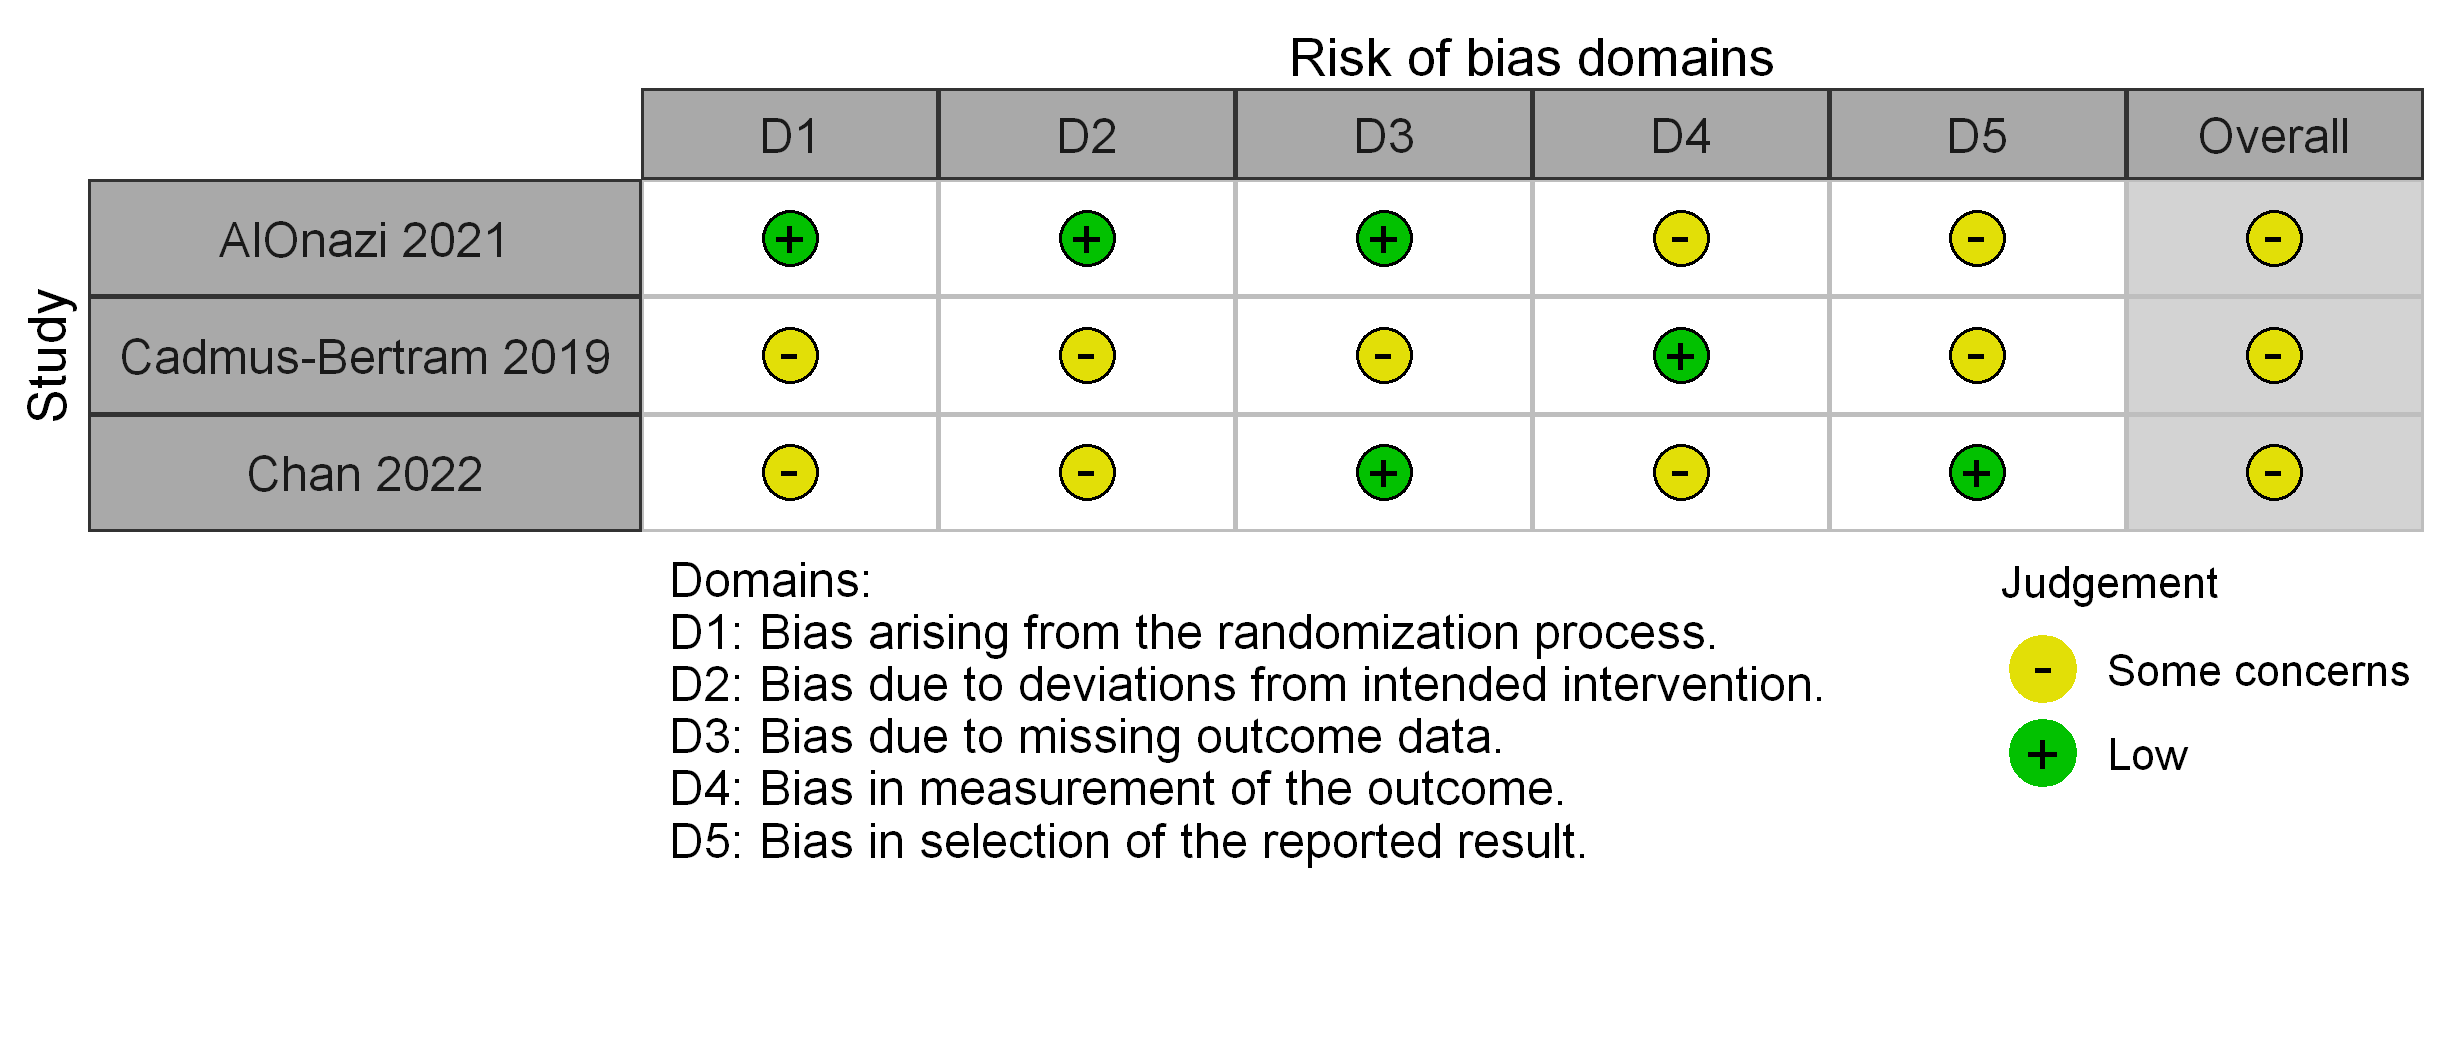

In [9]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 350)
rob_traffic_light(
  data = rob.rct.df,
  tool = "ROB2",
  psize = 5
)

## Systmatic reviews

In [10]:
# devtools::install_github('bougioukas/amstar2Vis')
library(amstar2Vis)

In [11]:
rob.sys.rev.df <- df |>
  filter(grepl("Sys", Study.design)) |>
  select(Study.ID, AMSTAR.1:AMSTAR.16) |>
  select(!ends_with("text"))
  
rob.sys.rev.df

Study.ID,AMSTAR.1,AMSTAR.2,AMSTAR.3,AMSTAR.4,AMSTAR.5,AMSTAR.6,AMSTAR.7,AMSTAR.8,AMSTAR.9,AMSTAR.10,AMSTAR.11,AMSTAR.12,AMSTAR.13,AMSTAR.14,AMSTAR.15,AMSTAR.16
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ayyoubzadeh 2020,No,No,No,Partial Yes,Yes,No,No,Partial Yes,No,No,No meta-analysis conducted,No meta-analysis conducted,No,No,No meta-analysis conducted,Yes


In [12]:
names(amstar2_gtable(rob.sys.rev.df))

[1] "_data"          "_boxhead"       "_stub_df"       "_row_groups"   
 [5] "_heading"       "_spanners"      "_stubhead"      "_footnotes"    
 [9] "_source_notes"  "_formats"       "_substitutions" "_styles"       
[13] "_summary"       "_options"       "_transforms"    "_locale"       
[17] "_has_built"

In [13]:
# turn footnotes into small letters
footnote.option <- tibble(list("letters"))
colnames(footnote.option) <- "value"
amstar2.table <- amstar2_gtable(rob.sys.rev.df)
amstar2.table$`_options`[1,2] <- footnote.option

In [14]:
# gtsave(
#   amstar2.table,
#   "AMSTAR-2.html"
# )

## Pre-post studies

In [15]:
rob.pre.post.df <- df |>
  filter(grepl("Pre-post", Study.design)) |>
  select(Study.ID, NHLBI.1:NHLBI.Overall) |>
  select(!ends_with("text")) |>
  relocate(Study.ID)
  
rob.pre.post.df

Study.ID,NHLBI.1,NHLBI.2,NHLBI.3,NHLBI.4,NHLBI.5,NHLBI.6,NHLBI.7,NHLBI.8,NHLBI.9,NHLBI.10,NHLBI.11,NHLBI.12,NHLBI.Overall
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
Cheong 2018,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,NA,Fair
Brennan 2022,Yes,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,NA,Fair


In [16]:
rob.pre.post.df

Study.ID,NHLBI.1,NHLBI.2,NHLBI.3,NHLBI.4,NHLBI.5,NHLBI.6,NHLBI.7,NHLBI.8,NHLBI.9,NHLBI.10,NHLBI.11,NHLBI.12,NHLBI.Overall
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
Cheong 2018,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,NA,Fair
Brennan 2022,Yes,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,NA,Fair


### Adopt amstar2Vis functions for NIH tool 

In [17]:
NIH_table <- function(data){


  label <- c("Study",
             "1. Study question",
             "2. Eligibility criteria",
             "3. Study population",
             "4. Enrollment of participants",
             "5. Sample size",
             "6. Description of intervention",
             "7. Description of outcome measure",
             "8. Blinding of outcome assessors",
             "9. Follow up rate",
             "10. Statistical analysis",
             "11. Multiple outcome measures",
             "12. Group-level interventions and individual-level outcome efforts",
             "overall")

  names(data) <- label


  return(data)

}

In [18]:
# adopt amstar2_gtable fucntion to print table of NIH tool 
NIH_gtable <- function(data){

  # select the AMSTAR items
  amstar2_gt <- NIH_table(data)


  # items
  levels(amstar2_gt$`1. Study question`) <- c("Yes", "No")
  amstar2_gt$`1. Study question` <- factor(amstar2_gt$`1. Study question`, levels = c("Yes", "No"))
  categories_fills1 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`2. Eligibility criteria`) <- c("Yes", "No")
  amstar2_gt$`2. Eligibility criteria` <- factor(amstar2_gt$`2. Eligibility criteria`, levels = c("Yes", "No"))
  categories_fills2 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`3. Study population`) <- c("Yes", "No")
  amstar2_gt$`3. Study population` <- factor(amstar2_gt$`3. Study population`, levels = c("Yes", "No"))
  categories_fills3 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`4. Enrollment of participants`) <- c("Yes", "No")
  amstar2_gt$`4. Enrollment of participants` <- factor(amstar2_gt$`4. Enrollment of participants`, levels = c("Yes", "No"))
  categories_fills4 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`5. Sample size`) <- c("Yes", "No")
  amstar2_gt$`5. Sample size` <- factor(amstar2_gt$`5. Sample size`, levels = c("Yes", "No"))
  categories_fills5 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`6. Description of intervention`) <- c("Yes", "No")
  amstar2_gt$`6. Description of intervention` <- factor(amstar2_gt$`6. Description of intervention`, levels = c("Yes", "No"))
  categories_fills6 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`7. Description of outcome measure`) <- c("Yes", "No")
  amstar2_gt$`7. Description of outcome measure` <- factor(amstar2_gt$`7. Description of outcome measure`, levels = c("Yes", "No"))
  categories_fills7 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`8. Blinding of outcome assessors`) <- c("Yes", "No")
  amstar2_gt$`8. Blinding of outcome assessors` <- factor(amstar2_gt$`8. Blinding of outcome assessors`, levels = c("Yes", "No"))
  categories_fills8 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`9. Follow up rate`) <- c("Yes", "No")
  amstar2_gt$`9. Follow up rate` <- factor(amstar2_gt$`9. Follow up rate`, levels = c("Yes", "No"))
  categories_fills9 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`10. Statistical analysis`) <- c("Yes", "No")
  amstar2_gt$`10. Statistical analysis` <- factor(amstar2_gt$`10. Statistical analysis`, levels = c("Yes", "No"))
  categories_fills10 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`11. Multiple outcome measures`) <- c("Yes", "No")
  amstar2_gt$`11. Multiple outcome measures` <- factor(amstar2_gt$`11. Multiple outcome measures`, levels = c("Yes", "No"))
  categories_fills11 = c("#3a5e8cFF", "#ffcf20FF")

  levels(amstar2_gt$`12. Group-level interventions and individual-level outcome efforts`) <- c("Yes", "No", "NA")
  amstar2_gt$`12. Group-level interventions and individual-level outcome efforts` <- factor(amstar2_gt$`12. Group-level interventions and individual-level outcome efforts`, levels = c("Yes", "No", "NA"))
  categories_fills12 = c("#3a5e8cFF", "#ffcf20FF", "#303030")


  # overall
  levels(amstar2_gt$overall) <- c("Good", "Fair", "Poor")
  amstar2_gt$overall <- factor(amstar2_gt$overall, levels = c("Good", "Fair", "Poor"))
  categories_fills <- c("Poor" = "#FDE4A6FF", "Fair" = "#9F2F7FFF", "Good" = "#00021E")


# gt table
amstar_gtable <- amstar2_gt |>
  dplyr::rename("Overall quality rating" = "overall") |>
  gt::gt() |>
  gt::data_color(
      columns = 2,
      method = "factor",
      palette = categories_fills1
    ) |>
  gt::data_color(
      columns = 3,
      method = "factor",
      palette = categories_fills2
    )|>
  gt::data_color(
      columns = 4,
      method = "factor",
      palette = categories_fills3
    )|>
  gt::data_color(
      columns = 5,
      method = "factor",
      palette = categories_fills4
    )|>
  gt::data_color(
      columns = 6,
      method = "factor",
      palette = categories_fills5
    ) |>
  gt::data_color(
      columns = 7,
      method = "factor",
      palette = categories_fills6
    ) |>
  gt::data_color(
      columns = 8,
      method = "factor",
      palette = categories_fills7
    ) |>
  gt::data_color(
      columns = 9,
      method = "factor",
      palette = categories_fills8
    ) |>
  gt::data_color(
      columns = 10,
      method = "factor",
      palette = categories_fills9
    ) |>
  gt::data_color(
      columns = 11,
      method = "factor",
      palette = categories_fills10
    ) |>
  gt::data_color(
      columns = 12,
      method = "factor",
      palette = categories_fills11
    )|>
  gt::data_color(
      columns = 13,
      method = "factor",
      palette = categories_fills12
    )|>
  gt::data_color(
      columns = 14,
      method = "factor",
      palette = categories_fills
    ) |>
  gt::cols_align(
    align = "center",
    columns = 2:13
  ) |>
  gt::tab_footnote(
    footnote = "Possible responses: Yes, No, Cannot determine (CD), Not applicable (NA), Not reported (NR)",
    gt::cells_column_labels(columns = 2:13)
  ) |>
  gt::tab_footnote(
    footnote = "Good/Fair/Poor quality rating for the results of the study (no deterministic rule of decision like in AMSTAR 2 or Rob 2 but a subjective judgement of the reviewer instead).",
    gt::cells_column_labels(columns = 14)
  ) |>
  gt::tab_spanner(
    label = "National Institutes of Health (NIH) quality assessment tool for before-after (Pre-Post) studies without control group",
    columns = 2:13) |>
  gt::tab_options(
    column_labels.font.weight = "bold"
  ) |>
  gt::tab_style(
    style = gt::cell_borders(
      sides = c("left"),
      color = "gray60",
      weight = gt::px(5.0),
      style = "solid"
    ),
    locations = gt::cells_body(columns = 14)
    ) |>
  gt::tab_style(
    style = gt::cell_borders(
      sides = "bottom",
      color = "black",
      weight = gt::px(3.0)
    ),
    locations = gt::cells_body(rows = nrow(amstar2_gt))
  ) |>
  gt::opt_footnote_marks(marks = "letters")

  return(amstar_gtable)

}

### Save table

In [29]:
library(gt)
library(colorspace)

In [20]:
# gtsave(
#   NIH_gtable(rob.pre.post.df),
#   "NIH.html"
# )
  

# Country distibution

In [21]:
library(maps)

In [22]:
names(df)

[1] "Covidence.."                         
 [2] "Study.ID"                            
 [3] "Title"                               
 [4] "Reviewer.Name"                       
 [5] "Notes"                               
 [6] "Country.in.which.the.study.conducted"
 [7] "Objective"                           
 [8] "Study.design"                        
 [9] "Digital.solutions"                   
[10] "Exercise.iterventions"               
[11] "Participant.description"             
[12] "Outcomes"                            
[13] "Evidence.of.effectiveness"           
[14] "Conclusion"                          
[15] "RoB2.D1"                             
[16] "RoB2.D1.supporting.text"             
[17] "RoB2.D2"                             
[18] "RoB2.D2.supporting.text"             
[19] "RoB2.D3"                             
[20] "RoB2.D3.supporting.text"             
[21] "RoB2.D4"                             
[22] "RoB2.D4.supporting.text"             
[23] "RoB2.D5"                             
[24] "RoB2.D5.supporting.text"             
[25] "RoB2.Overall"                        
[26] "RoB2.Overall.supporting.text"        
[27] "AMSTAR.1"                            
[28] "AMSTAR.1.supporting.text"            
[29] "AMSTAR.2"                            
[30] "AMSTAR.2.supporting.text"            
[31] "AMSTAR.3"                            
[32] "AMSTAR.3.supporting.text"            
[33] "AMSTAR.4"                            
[34] "AMSTAR.4.supporting.text"            
[35] "AMSTAR.5"                            
[36] "AMSTAR.5.supporting.text"            
[37] "AMSTAR.6"                            
[38] "AMSTAR.6.supporting.text"            
[39] "AMSTAR.7"                            
[40] "AMSTAR.7.supporting.text"            
[41] "AMSTAR.8"                            
[42] "AMSTAR.8.supporting.text"            
[43] "AMSTAR.9"                            
[44] "AMSTAR.9.supporting.text"            
[45] "AMSTAR.10"                           
[46] "AMSTAR.10.supporting.text"           
[47] "AMSTAR.11"                           
[48] "AMSTAR.11.supporting.text"           
[49] "AMSTAR.12"                           
[50] "AMSTAR.12.supporting.text"           
[51] "AMSTAR.13"                           
[52] "AMSTAR.13.supporting.text"           
[53] "AMSTAR.14"                           
[54] "AMSTAR.14.supporting.text"           
[55] "AMSTAR.15"                           
[56] "AMSTAR.15.supporting.text"           
[57] "AMSTAR.16"                           
[58] "AMSTAR.16.supporting.text"           
[59] "AMSTAR.Overall"                      
[60] "AMSTAR.Overall.supporting.text"      
[61] "NHLBI.1"                             
[62] "NHLBI.1.supporting.text"             
[63] "NHLBI.2"                             
[64] "NHLBI.2.supporting.text"             
[65] "NHLBI.3"                             
[66] "NHLBI.3.supporting.text"             
[67] "NHLBI.4"                             
[68] "NHLBI.4.supporting.text"             
[69] "NHLBI.5"                             
[70] "NHLBI.5.supporting.text"             
[71] "NHLBI.6"                             
[72] "NHLBI.6.supporting.text"             
[73] "NHLBI.7"                             
[74] "NHLBI.7.supporting.text"             
[75] "NHLBI.8"                             
[76] "NHLBI.8.supporting.text"             
[77] "NHLBI.9"                             
[78] "NHLBI.9.supporting.text"             
[79] "NHLBI.10"                            
[80] "NHLBI.10.supporting.text"            
[81] "NHLBI.11"                            
[82] "NHLBI.11.supporting.text"            
[83] "NHLBI.12"                            
[84] "NHLBI.12.supporting.text"            
[85] "NHLBI.Overall"                       
[86] "NHLBI.Overall.supporting.text"

In [25]:
# cut yout "Other: "
df[, "Country.in.which.the.study.conducted"] <- gsub("Other: ", "",df[, "Country.in.which.the.study.conducted"])
df[, "Country.in.which.the.study.conducted"]

[1] "South Korea"   "United States" "United States" "Ireland"      
[5] "Iran"          "Canada"

In [38]:
# Count countries
country.df <- data.frame(region = df[, "Country.in.which.the.study.conducted"])
country.df[country.df == "United States"] <- "USA"
country.df <- data.frame(table(country.df))
country.df$region <- as.character(country.df$region)
country.df

region,Freq
<chr>,<int>
Canada,1
Iran,1
Ireland,1
South Korea,1
USA,2


Warning message in geom_map(data = WorldData, map = WorldData, aes(x = long, y = lat, :
"Ignoring unknown aesthetics: x and y"


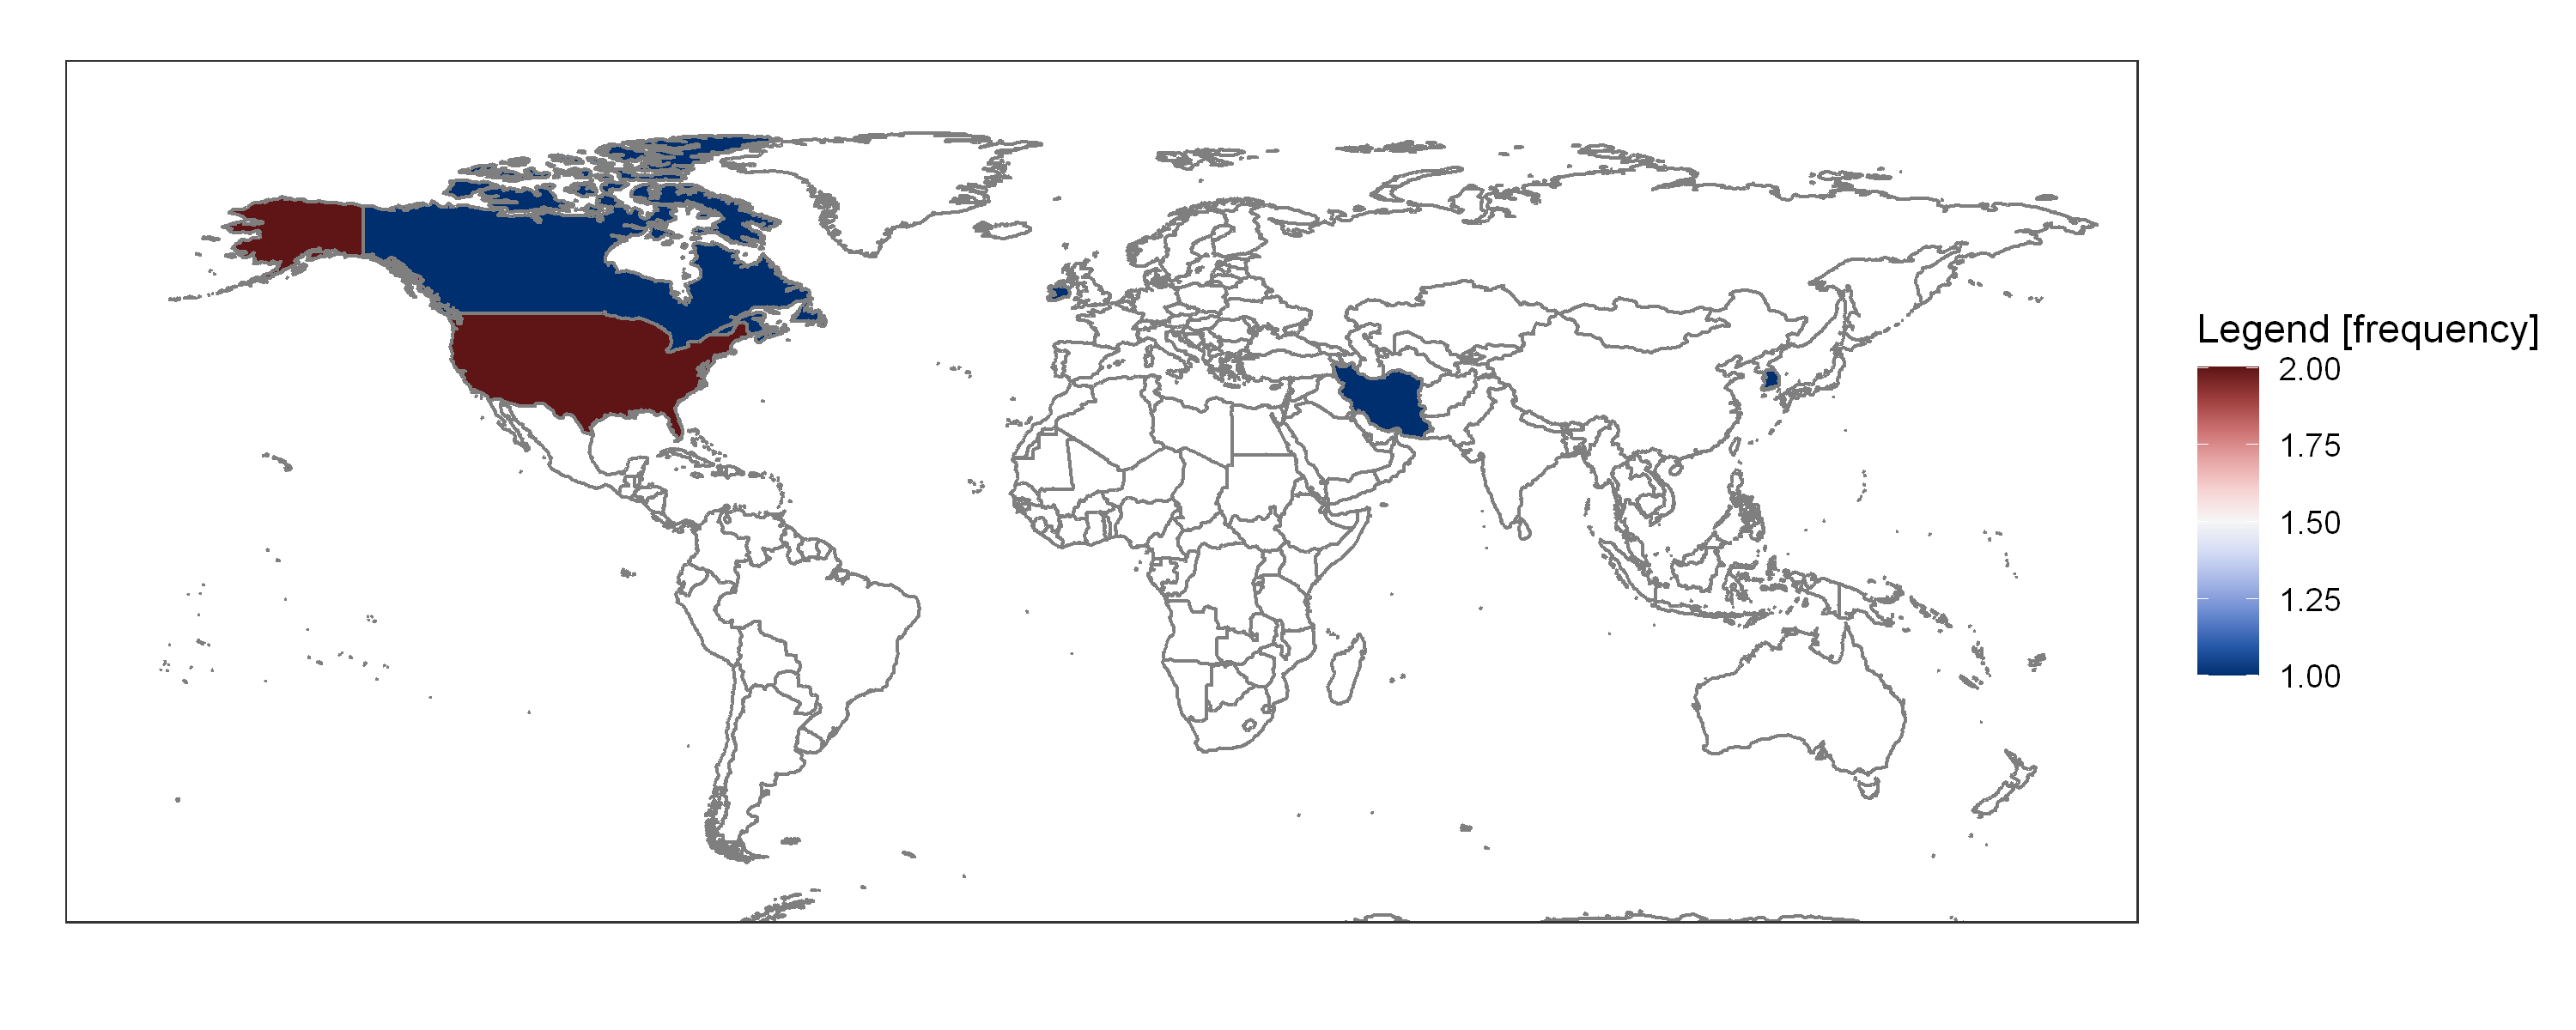

In [39]:
# set plot size
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

WorldData <- map_data('world')

ggplot() +
  geom_map(
    data = WorldData, map = WorldData,
    aes(x = long, y = lat, group = group, map_id = region),
    fill = "white", colour = "#7f7f7f", size=0.5
  ) + 
  geom_map(
    data = country.df, map=WorldData,
    aes(fill=Freq, map_id=region),
    colour="#7f7f7f", size=0.5
  ) +
  coord_map("rectangular", lat0=0, xlim=c(-180,180), ylim=c(-60, 90)) +
  # scale_fill_continuous(type = "viridis") +  # alternative scale color
  scale_fill_continuous_diverging(
    palette = "Blue-Red 3",  # rev = TRUE,
    mid = 1.5
  ) +  # scale color
  scale_y_continuous(breaks=c()) +
  scale_x_continuous(breaks=c()) +
  labs(fill="Legend [frequency]", x="", y="") +
  theme_bw()